In [1]:
import numpy as np
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Vaishnavi\Downloads\startup_funding.csv")

In [3]:
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


### Non Null Values and data types in each column

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


### Here, yellow represents the null values in that particular column

<Axes: >

<Figure size 1000x500 with 0 Axes>

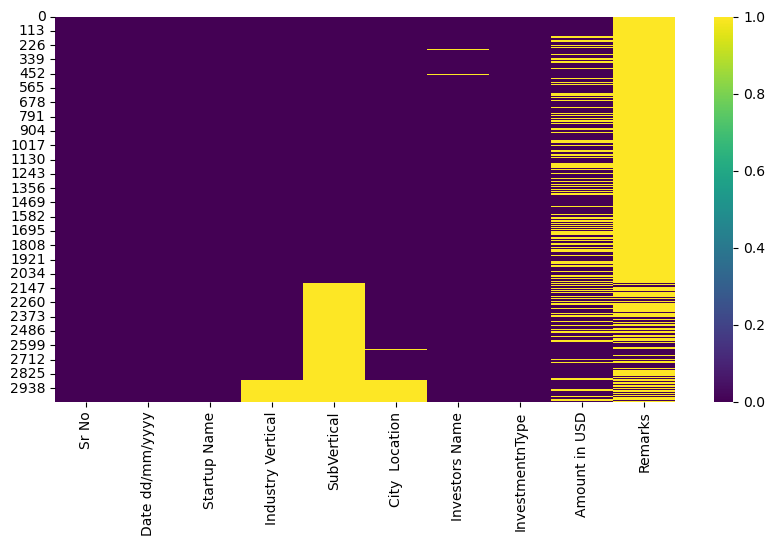

In [5]:
plt.figure(figsize=(10,5))
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap ="viridis")

###   <font color = red> Data preprocessing </font>

In [6]:
data["City  Location"] = data["City  Location"].fillna(value = "NotSpecific")

In [7]:
data["Industry Vertical"] = data["Industry Vertical"].fillna(value = "Other")

In [8]:
import re
def convert_Slash(x):
    x= x.lower()
    if re.search("/",x):
        return x.split("/")[0].strip()
    else:
        return x.strip()
    
data["City  Location"]  = data["City  Location"].apply(convert_Slash)  

In [9]:
newdf = data.copy()
del newdf["Remarks"]
del newdf["Sr No"]

In [10]:
newdf['InvestmentnType'] = pd.Categorical(newdf.InvestmentnType)
newdf.dtypes

Date dd/mm/yyyy        object
Startup Name           object
Industry Vertical      object
SubVertical            object
City  Location         object
Investors Name         object
InvestmentnType      category
Amount in USD          object
dtype: object

In [11]:
newdf["Amount in USD"] = newdf["Amount in USD"].apply(lambda x: str(x).replace(",",""))
newdf["Amount in USD"] = pd.to_numeric(newdf["Amount in USD"],errors='coerce')

In [12]:
def calculate_n_investors(x):#function to calculate record wise number of investors
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
newdf['numberofinvestors']=newdf['Investors Name'].replace(np.NaN,'empty').apply(calculate_n_investors)#removing missing investors and replacing with 'empty

In [13]:
n_inv2=newdf

n_inv=newdf['Investors Name']
n_inv.fillna(value='None',inplace=True)
listed_n_inv=n_inv.apply(lambda x: x.lower().strip().split(','))
investors=[]
for i in listed_n_inv:
    for j in i:
        if(i!='None' or i!=''):
            investors.append(j.strip())
unique_investors=list(set(investors))

In [14]:
newdf['InvestmentnType'].fillna(method='bfill',inplace=True)#backward filling of null values

In [15]:
newdf['Amount in USD']=round(newdf['Amount in USD'].fillna(np.mean(newdf['Amount in USD'])))
newdf['Amount in USD']=newdf['Amount in USD'].astype('int')

###   <font color = red> Data after preprocessing </font>

In [16]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Date dd/mm/yyyy    3044 non-null   object  
 1   Startup Name       3044 non-null   object  
 2   Industry Vertical  3044 non-null   object  
 3   SubVertical        2108 non-null   object  
 4   City  Location     3044 non-null   object  
 5   Investors Name     3044 non-null   object  
 6   InvestmentnType    3044 non-null   category
 7   Amount in USD      3044 non-null   int32   
 8   numberofinvestors  3044 non-null   int64   
dtypes: category(1), int32(1), int64(1), object(6)
memory usage: 183.9+ KB


In [17]:
unique_startup_name=list(newdf['Startup Name'].unique())
startupname=list(newdf['Startup Name'])

In [18]:
for i in range(len(unique_startup_name)):
    for j in range(len(startupname)):
        if(re.search(unique_startup_name[i],startupname[j])):
            startupname[j]=unique_startup_name[i]

In [19]:
newdf['StartupName']=startupname

###  <div class="alert alert-warning">Number of Unique Startups.</div>

In [20]:
print(newdf['StartupName'].nunique())

2346


### <div class="alert alert-warning">Top 10 startups that had most funding.</div>

In [21]:
from pandas import DataFrame as show
tp10fund=show(newdf.groupby('StartupName')['Amount in USD'].sum().sort_values(ascending=False))
tp10fund.head(10)

,Amount in USD
StartupName,
Paytm,3385809794
Ola,2091059794
Udaan,870000000
Oyo,712000000
Snapdeal,700000000
True North,600000000
BigBasket,507000000
GOQii,486859794
Zomato,435000000


### <div class="alert alert-warning">Word Cloud of best startups based on amount of funding</div>

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_19640\1850465248.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  st=pd.Series(newdf.groupby('StartupName').sum()['Amount in USD'].sort_values(ascending=False).head(40).index).head(30)


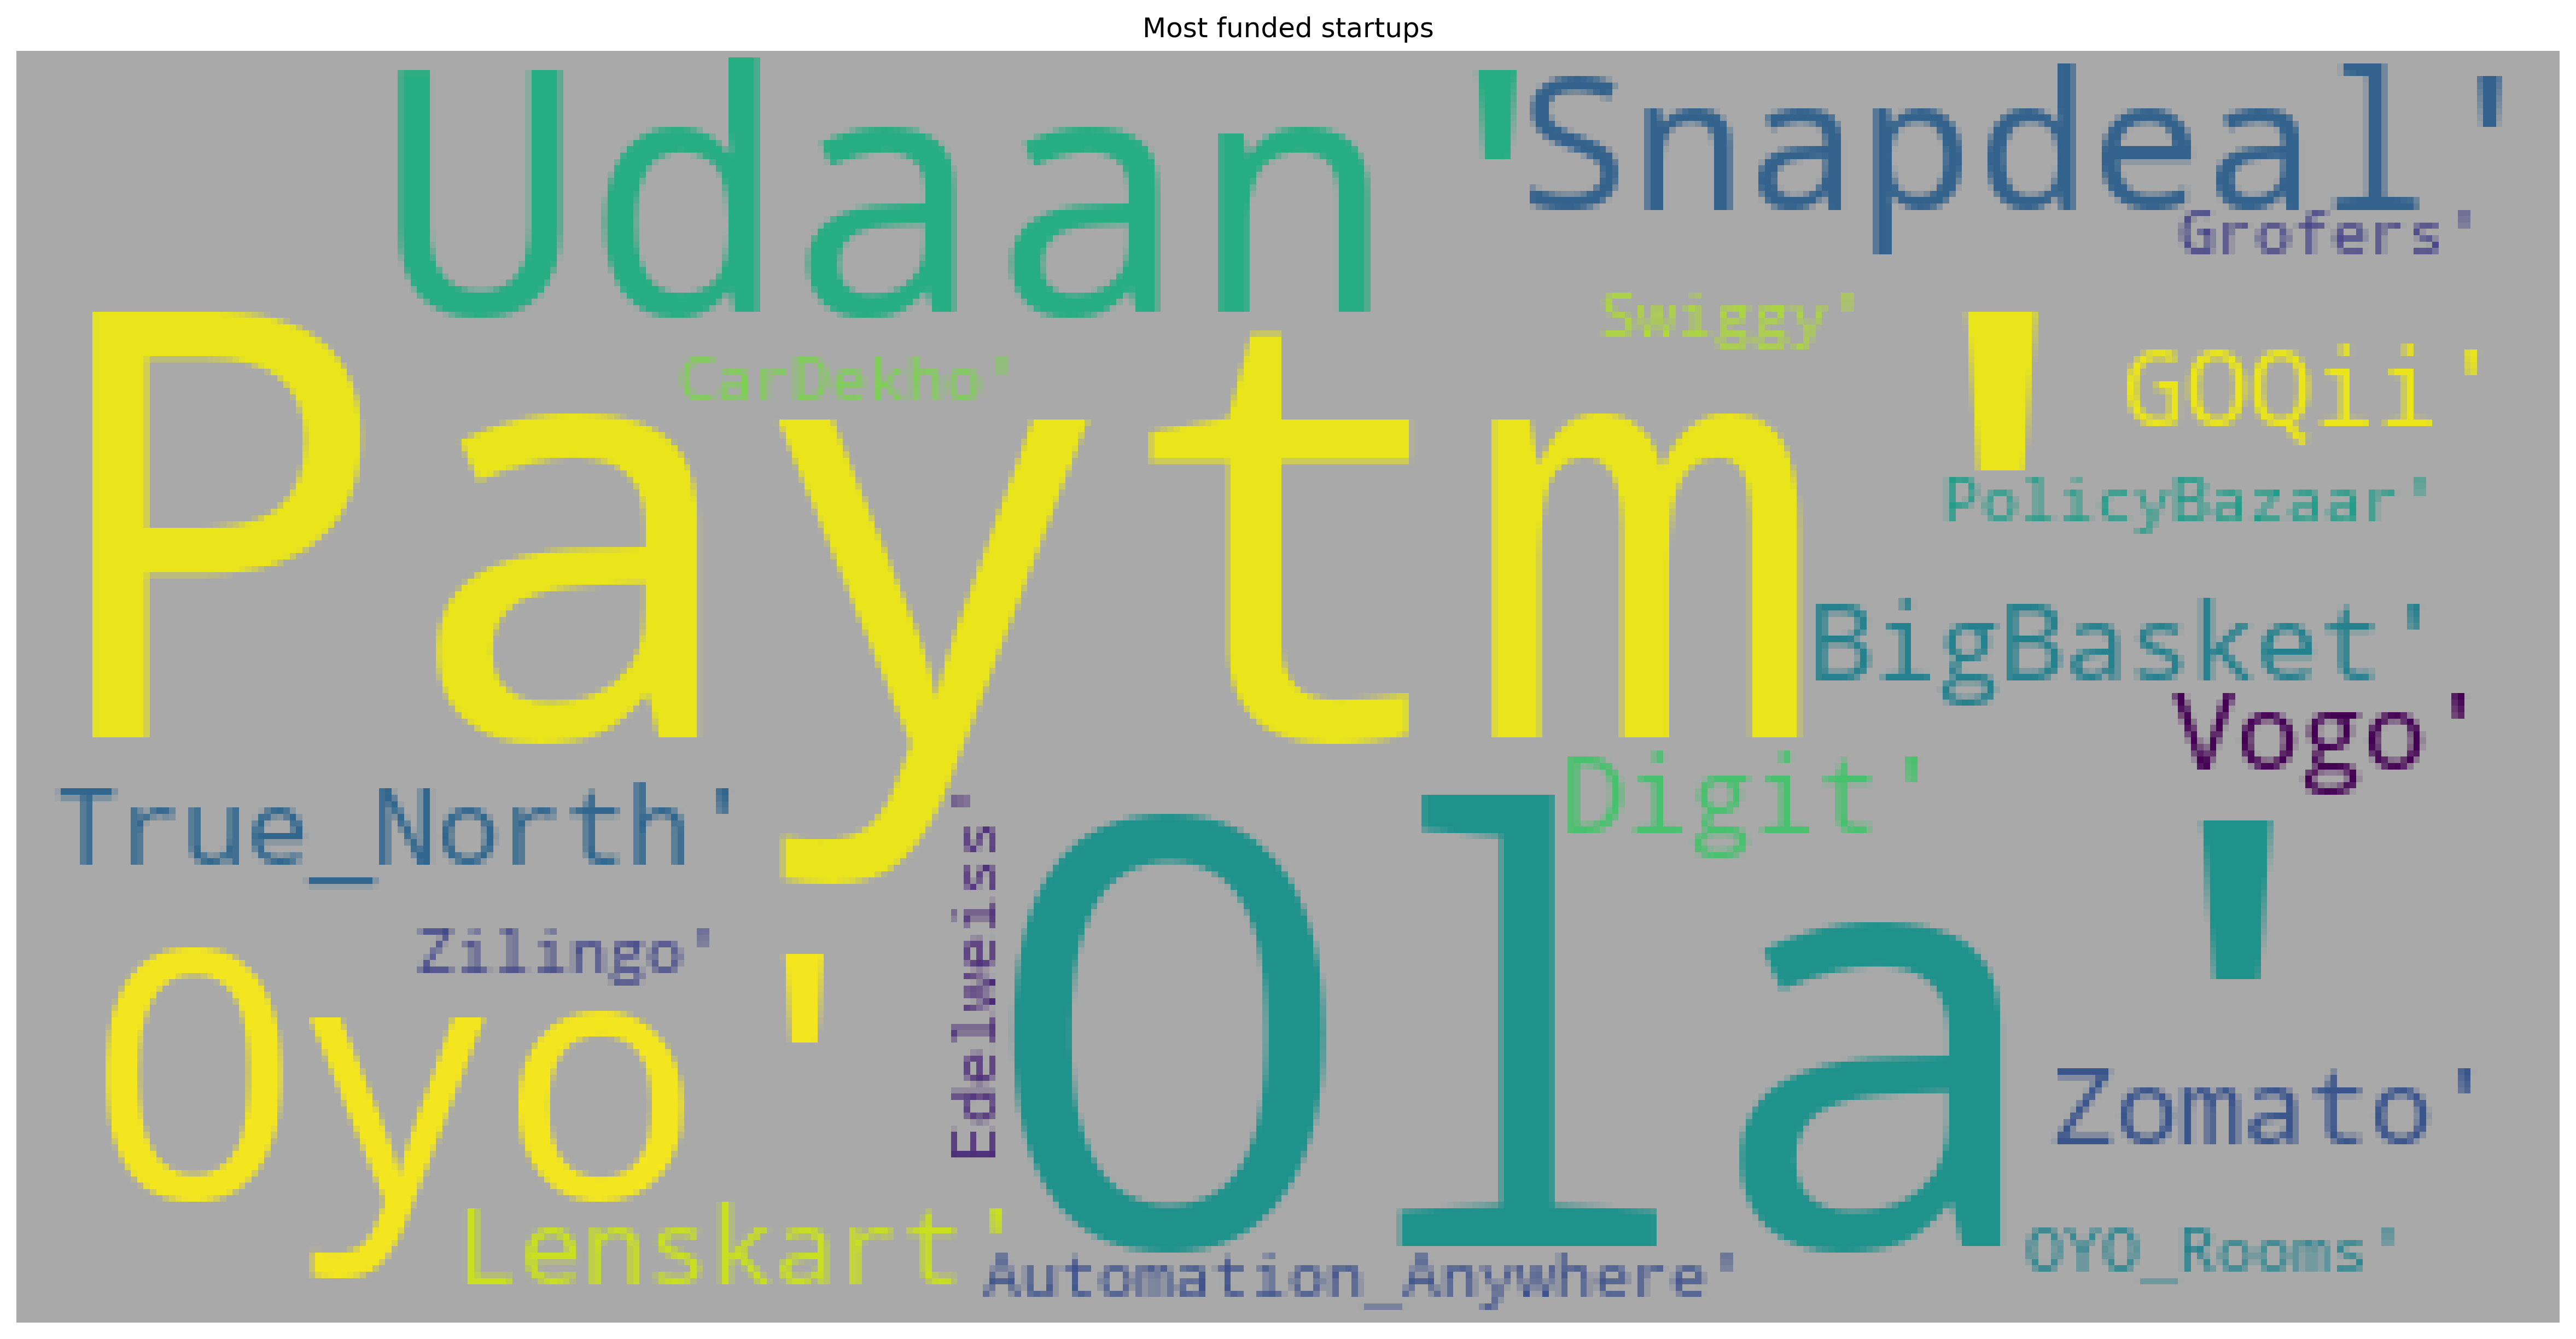

In [22]:
from wordcloud import WordCloud, STOPWORDS

st=pd.Series(newdf.groupby('StartupName').sum()['Amount in USD'].sort_values(ascending=False).head(40).index).head(30)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(20,20),dpi=300)

for char in range(len(st)):
    st[char]=st[char].replace(' ','_')

wc=WordCloud(max_words=20,stopwords=set(st),background_color='darkgrey',random_state=0).generate(str(st.values[:30]))
ax.axis('off')
ax.set_title('Most funded startups')
ax.imshow(wc)




### <div class="alert alert-warning">Word Cloud of best sectors based on amount of funding</div>

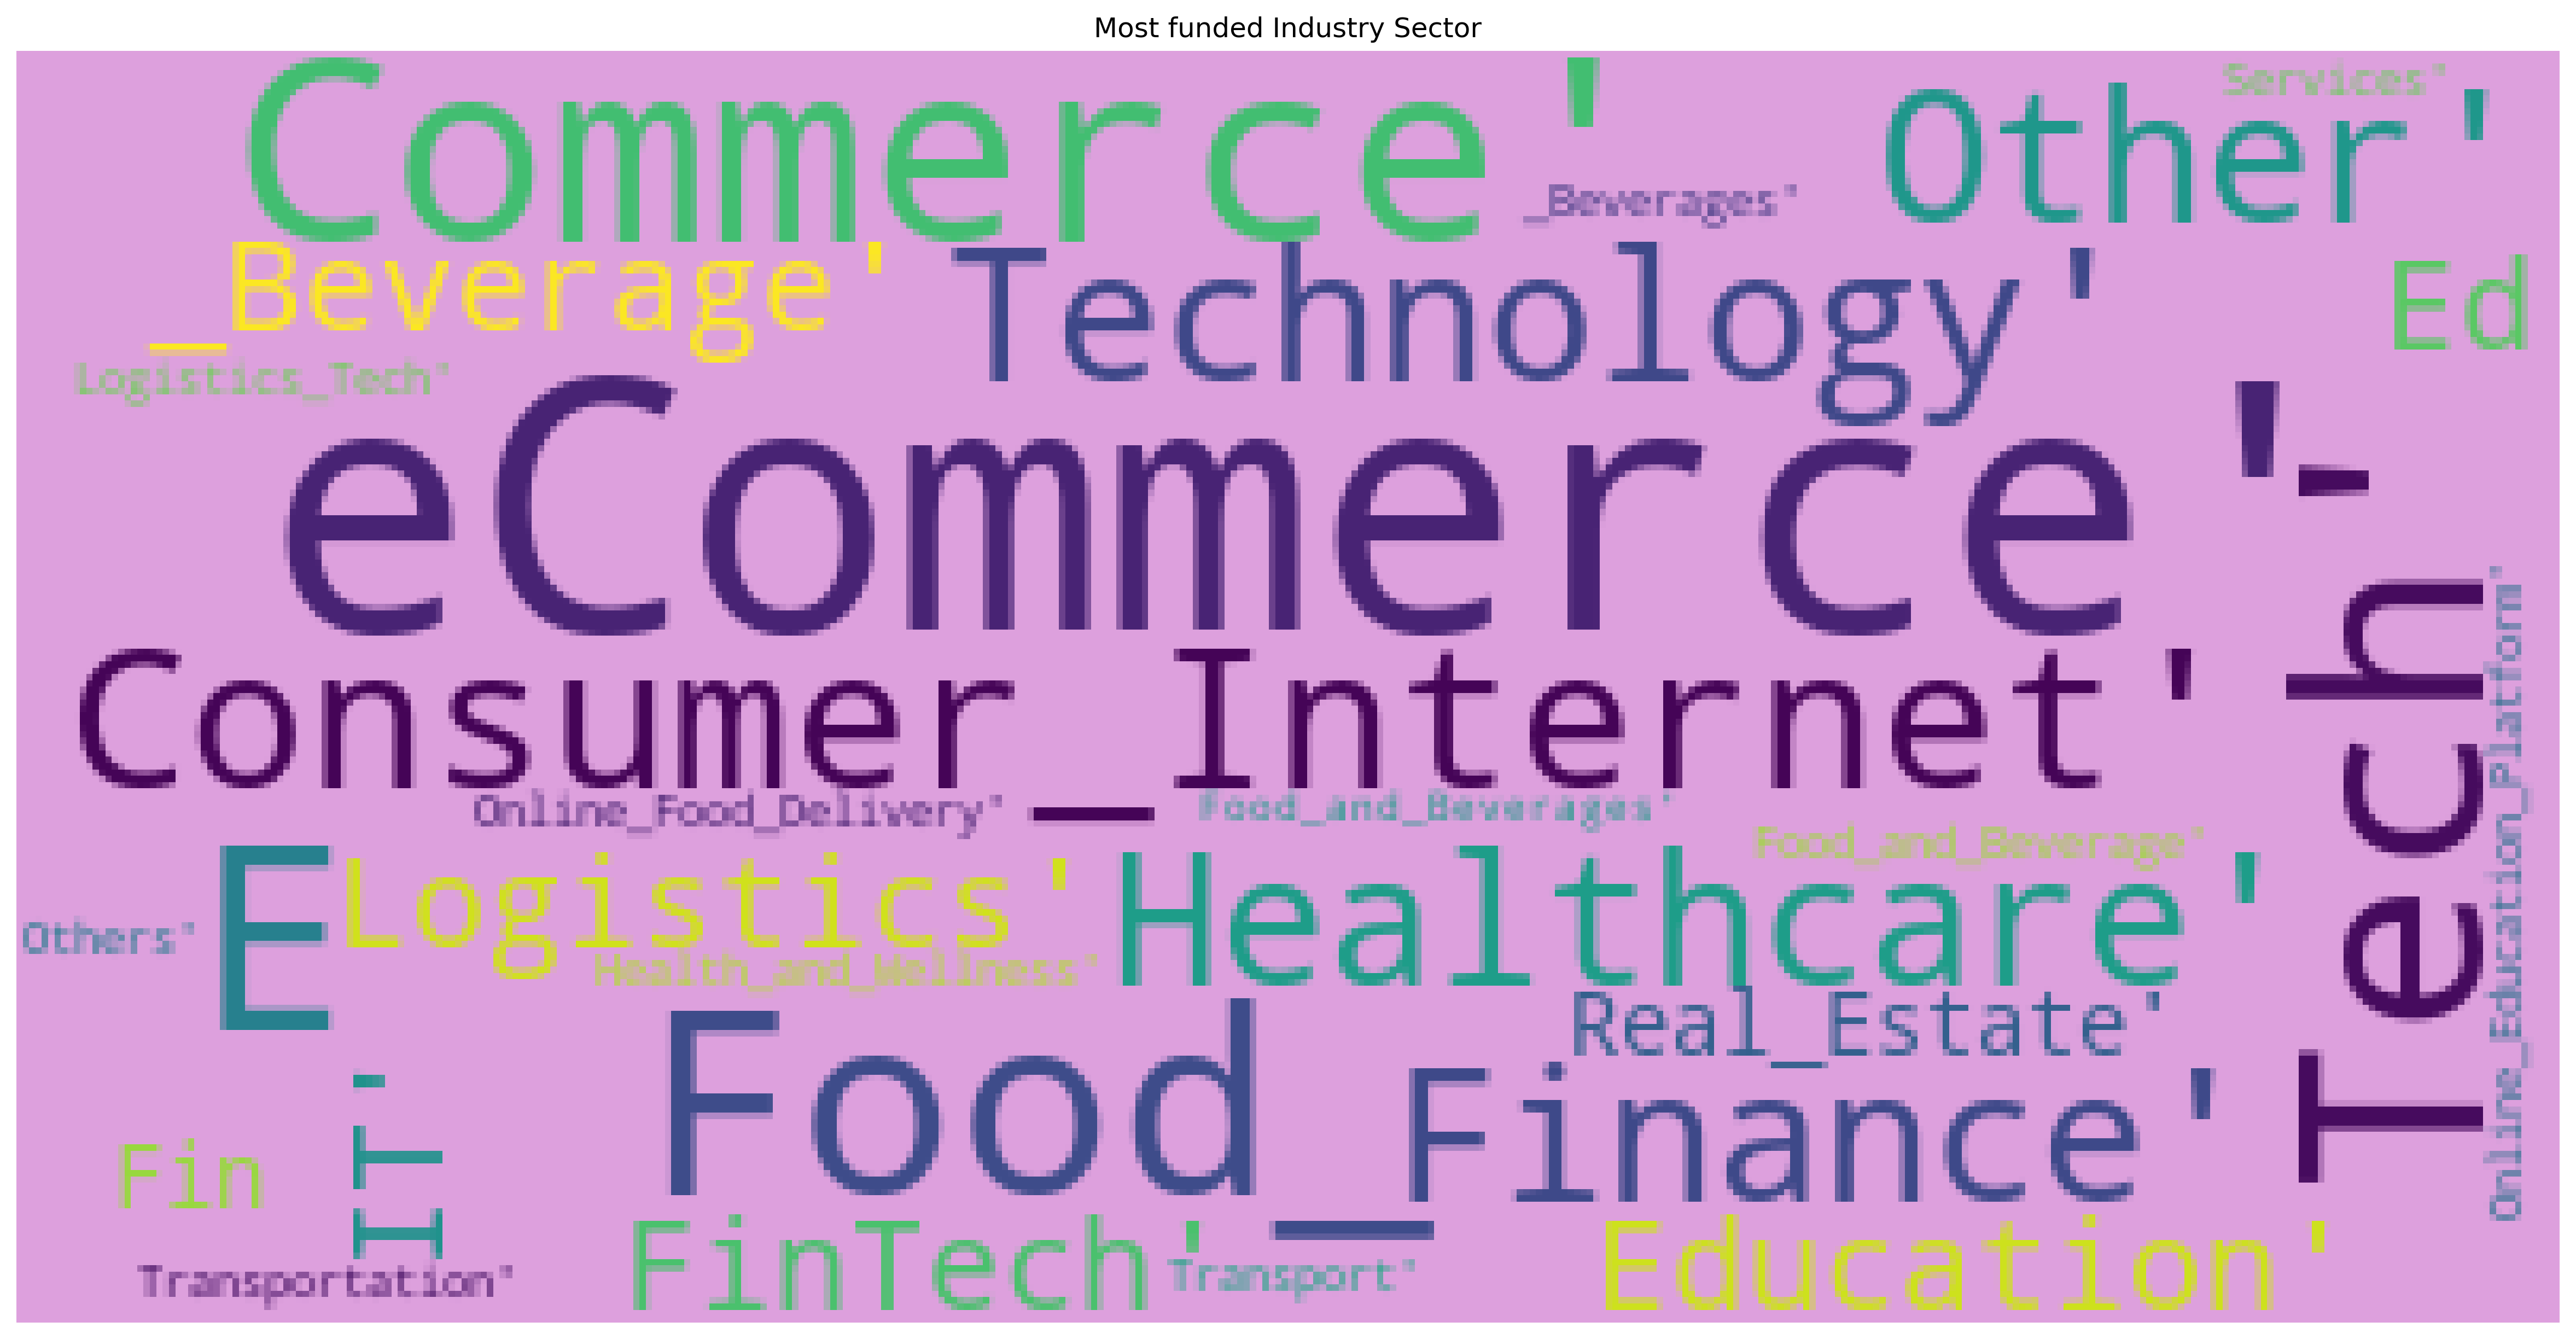

In [23]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(20,20),dpi=300)
c=np.array(newdf['Industry Vertical'].value_counts().head(30).index.unique())
for char in range(len(c)):
    c[char]=c[char].replace(' ','_')

               
wc=WordCloud(max_words=30,stopwords=set(c),background_color='plum',random_state=1).generate(str(c))

ax.axis('off')
ax.set_title('Most funded Industry Sector')

ax.imshow(wc)
plt.rcParams['axes.facecolor'] = 'white'

### <div class="alert alert-warning">Companies with most number of investors</div>

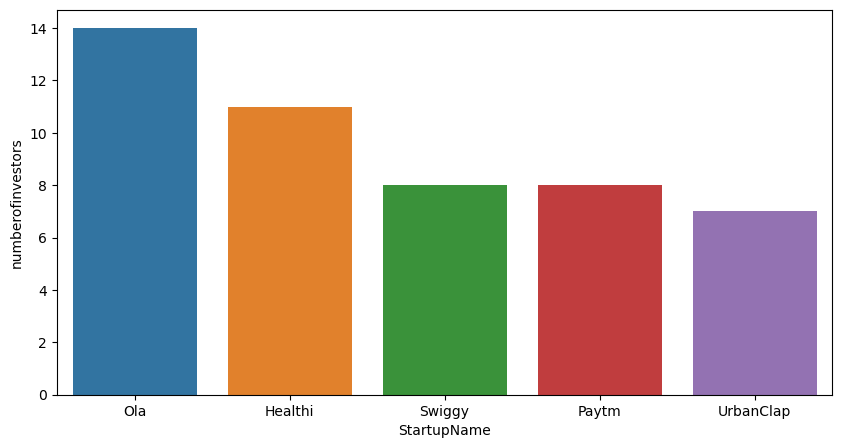

,numberofinvestors
StartupName,
Ola,14
Healthi,11
Swiggy,8
Paytm,8
UrbanClap,7
Digit,7
Medinfi,6
Flipkart,6
Nykaa,6


In [24]:
cmi=show(newdf.groupby('StartupName')['numberofinvestors'].count().sort_values(ascending=False))
fig=plt.figure(figsize=(10,5))
sns.barplot(y='numberofinvestors',x='StartupName',data=cmi.reset_index().head())
plt.show()
cmi.head(10)

### <div class="alert alert-warning">We can see that most of the companies have 2 investors</div>

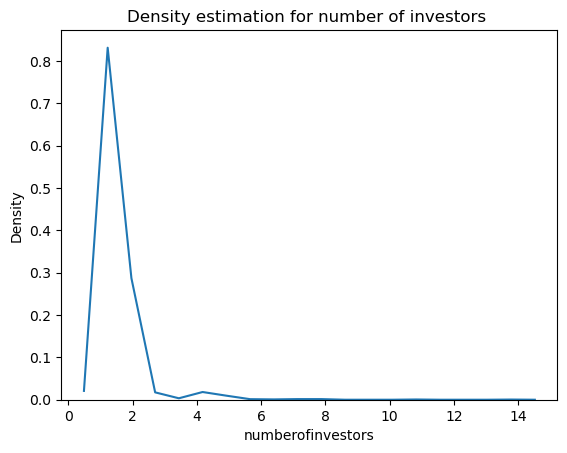

In [25]:
sns.kdeplot(data=cmi.reset_index()['numberofinvestors'],gridsize=20,)
plt.title('Density estimation for number of investors ')
plt.show()

### <div class="alert alert-warning">Here we can see that for 40 percent of the companies there is a relation between funding amount and number of investors</div>

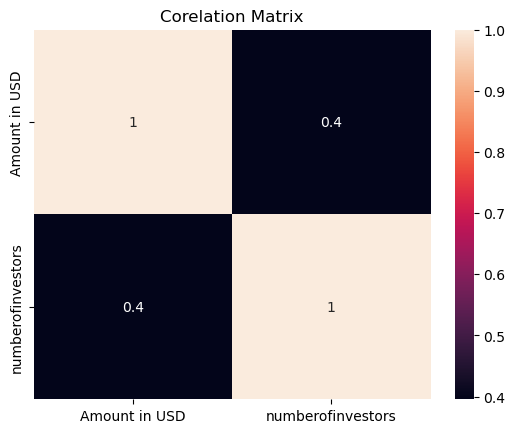

In [26]:
top10=tp10fund.join(cmi)
sns.heatmap(top10.corr(),annot=True)
plt.title('Corelation Matrix')
plt.show()

In [27]:
d=dict()
for i in unique_investors:
    for j in range(len(listed_n_inv)):
        if i in listed_n_inv[j]:
            d[i]=newdf['Amount in USD'][j]/len(listed_n_inv[j])

In [28]:
Investor_amount=pd.Series(d,name='Amount')

Investor_amount=show(Investor_amount,).reset_index().groupby('index').sum()['Amount'].sort_values(ascending=False).head(100)
Investor_amount=show(Investor_amount).reset_index()
Investor_amount.columns=["Investor","Amount"]

###  <div class="alert alert-warning">Top 10 most funded investors</div>

Top 10 Most funded Investors
                                            Investor        Amount
0           steadview capital and existing investors  7.000000e+08
1                                          microsoft  4.666667e+08
2             bennett coleman and company ltd (bccl)  4.500000e+08
3                                      alibaba group  3.400000e+08
4                                softbank group corp  3.300000e+08
5                                  altimeter capital  2.925000e+08
6                                   simi pacific pte  2.600000e+08
7  dst global and lightspeed venture partners\\xe...  2.250000e+08
8                               amour infrastructure  2.200000e+08
9                     global institutional investors  2.000000e+08


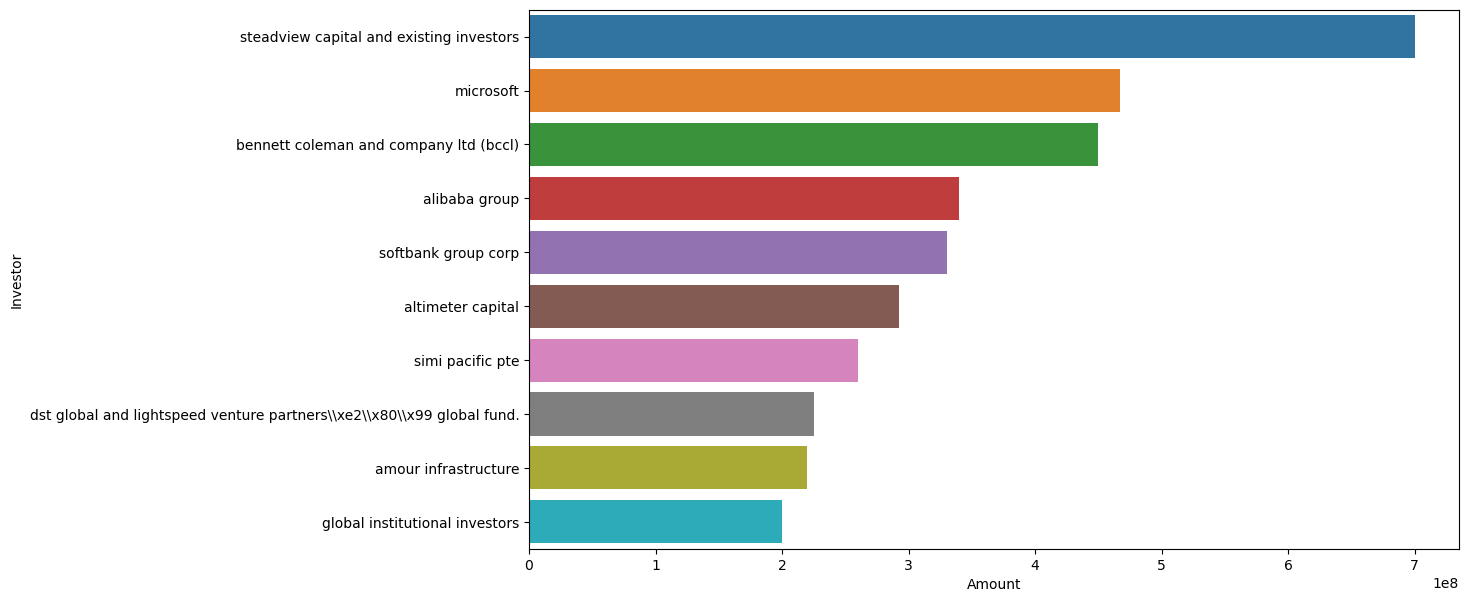

In [29]:
print('Top 10 Most funded Investors')
plt.figure(figsize=(12,7))
sns.barplot(y='Investor',x='Amount',data=Investor_amount.head(10))
print(Investor_amount.head(10))
plt.show()

In [30]:
top_industry_vertical={}
for i in Investor_amount['Investor'].head(20):
    for j in range(len(listed_n_inv)):
        if i in listed_n_inv[j]:
            top_industry_vertical[i]=newdf['Industry Vertical'][j]

# <div class="alert alert-warning">Industry sector opted by Top Investors</div>

top investor's favourite Industry  
steadview capital and existing investors                                                Online Marketplace
microsoft                                                                                        eCommerce
bennett coleman and company ltd (bccl)                                                 Health and Wellness
alibaba group                                                             E-Commerce & M-Commerce platform
softbank group corp                                                                      Consumer Internet
altimeter capital                                                                                      B2B
simi pacific pte                                                                         Consumer Internet
dst global and lightspeed venture partners\\xe2\\x80\\x99 global fund.                        B2B Platform
amour infrastructure                                                                            E-Commerce
g

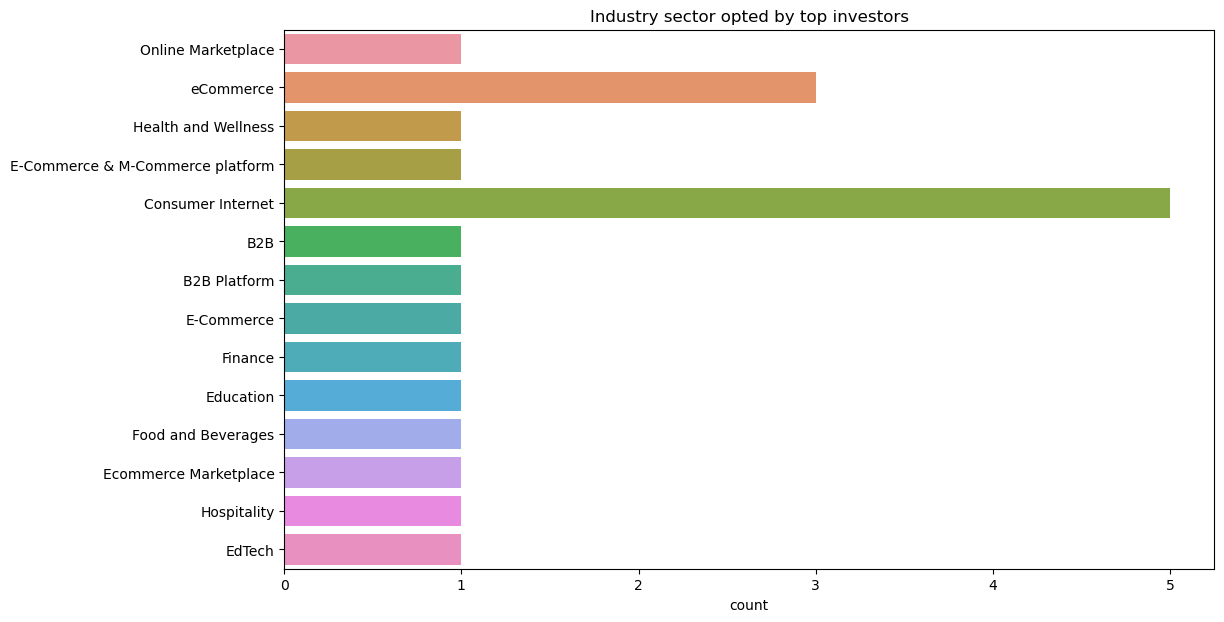

In [31]:
plt.figure(figsize=(12,7))
sns.countplot(y=pd.Series(top_industry_vertical))
plt.title('Industry sector opted by top investors' )
print('top investor\'s favourite Industry  ')
print(pd.Series(top_industry_vertical))
plt.show()

In [32]:

newdf['Industry Vertical']=newdf['Industry Vertical'].apply(lambda x:x.lower())

# <div class="alert alert-warning">Top 10 Industry Sectors with most funding</div>

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_19640\1211861079.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  f=newdf.groupby('InvestmentnType').sum()['Amount in USD']


([<matplotlib.patches.Wedge at 0x16500b9a410>,
 [Text(-0.7980809539507192, -0.8961399393739297, 'consumer internet'),
  Text(1.0996538142701664, 0.027595085813860713, 'technology'),
  Text(0.3683184280026087, 1.0365044792926306, 'ecommerce'),
  Text(-0.3880364950875251, 1.029285032670829, 'other'),
  Text(-0.7550112391095881, 0.7999737675812905, 'healthcare')],
 [Text(-0.46554722313791946, -0.5227482979681256, '49.1%'),
  Text(0.5998111714200908, 0.015051864989378569, '24.9%'),
  Text(0.20090096072869565, 0.5653660796141621, '13.4%'),
  Text(-0.21165627004774093, 0.5614281996386339, '8.9%'),
  Text(-0.4118243122415935, 0.43634932777161295, '3.7%')])

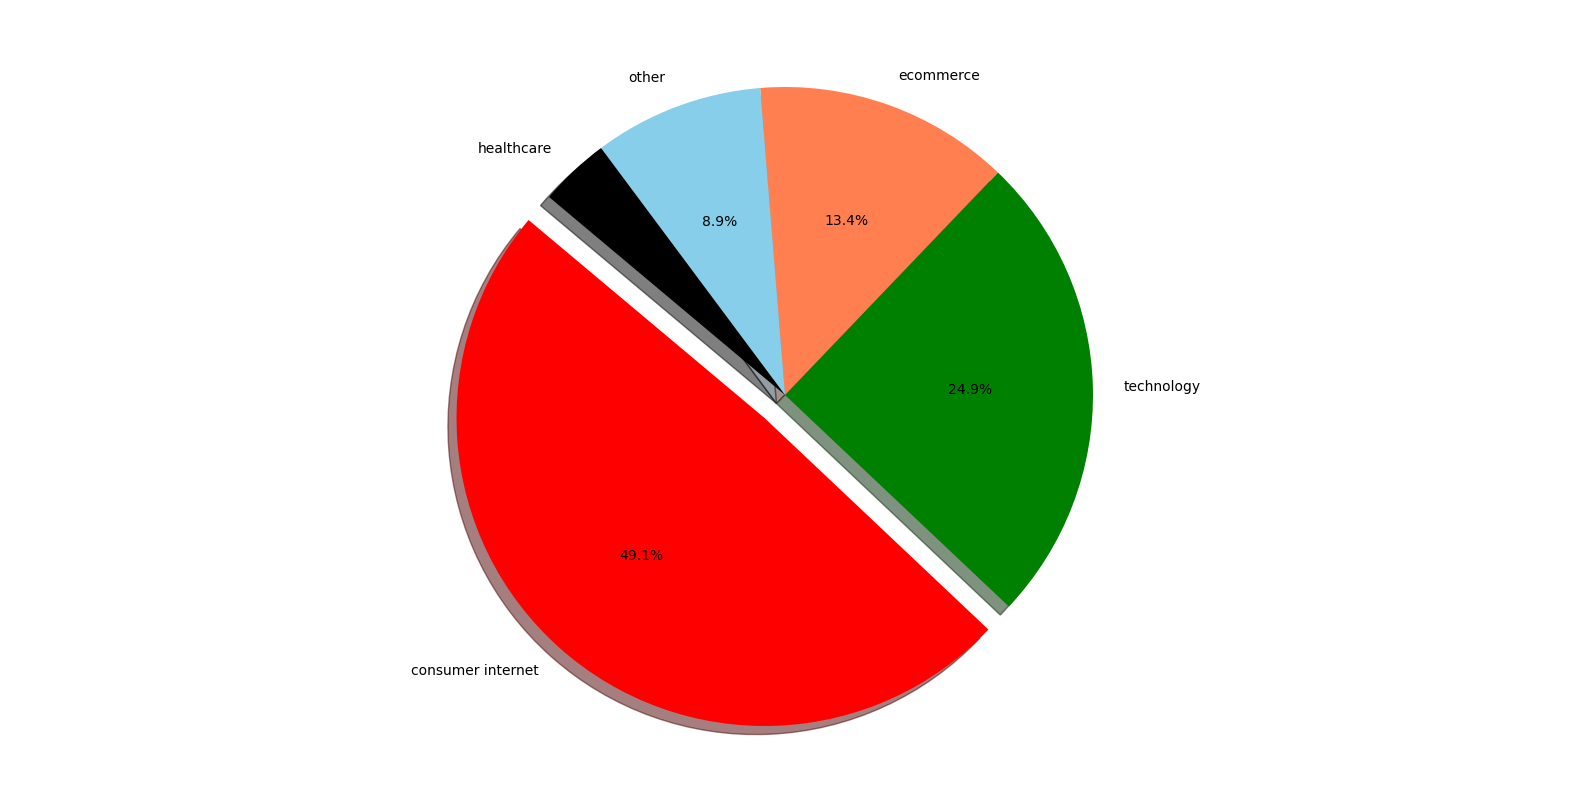

In [42]:
d=newdf['Industry Vertical'].value_counts().head(5)
f=newdf.groupby('InvestmentnType').sum()['Amount in USD']
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(20,10))
labels=[d.index,f.index]
size=[d.values,f.values]
colors = [['red', 'green', 'coral', 'skyblue','black']]
plt.axis('equal')
explode = ((0.1, 0, 0, 0,0),(-0.5,0.5,0.1,0.1))
ax.pie(size[0],explode=explode[0], labels=labels[0], colors=colors[0],
        autopct='%1.1f%%', shadow=True, startangle=140)


# <div class="alert alert-warning">Frequency of industry verticals</div>

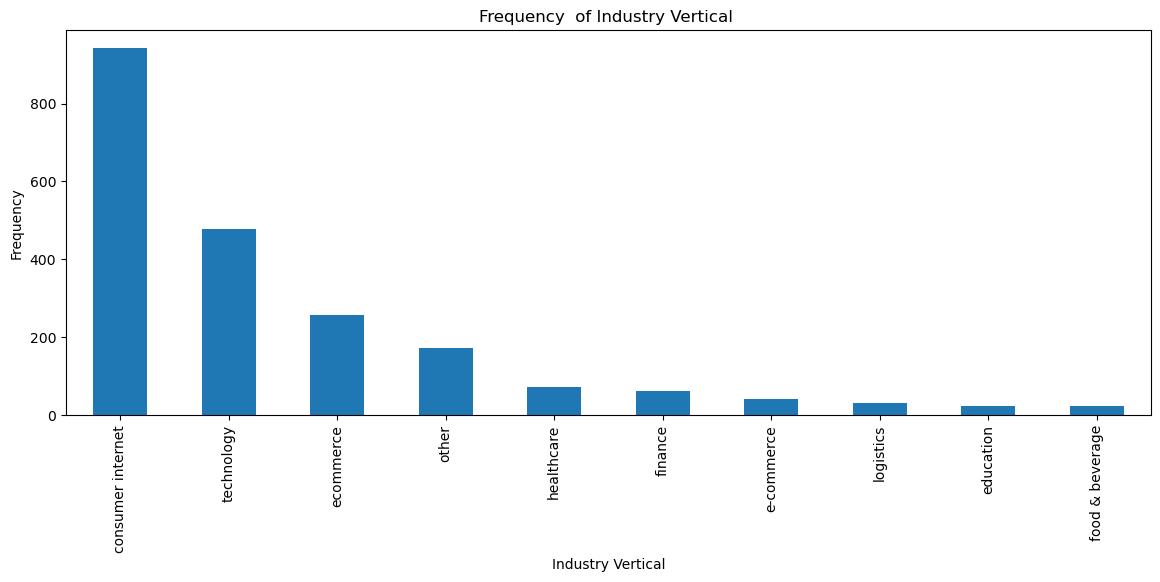

In [34]:
plt.figure(figsize=(14,5))
iv=newdf['Industry Vertical'].value_counts().head(10)
iv.plot.bar()

plt.title('Frequency  of Industry Vertical ')
plt.ylabel('Frequency')
plt.xlabel('Industry Vertical')
plt.show()

# <div class="alert alert-warning">Most preferrable cities as per Investment on startups</div>

C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_19640\805367837.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_amount = newdf.groupby('City  Location').mean()["Amount in USD"].astype('int').sort_values(ascending=False).iloc[1:].head(10)


Text(0.5, 1.0, 'Distribution of Startups across Top cities')

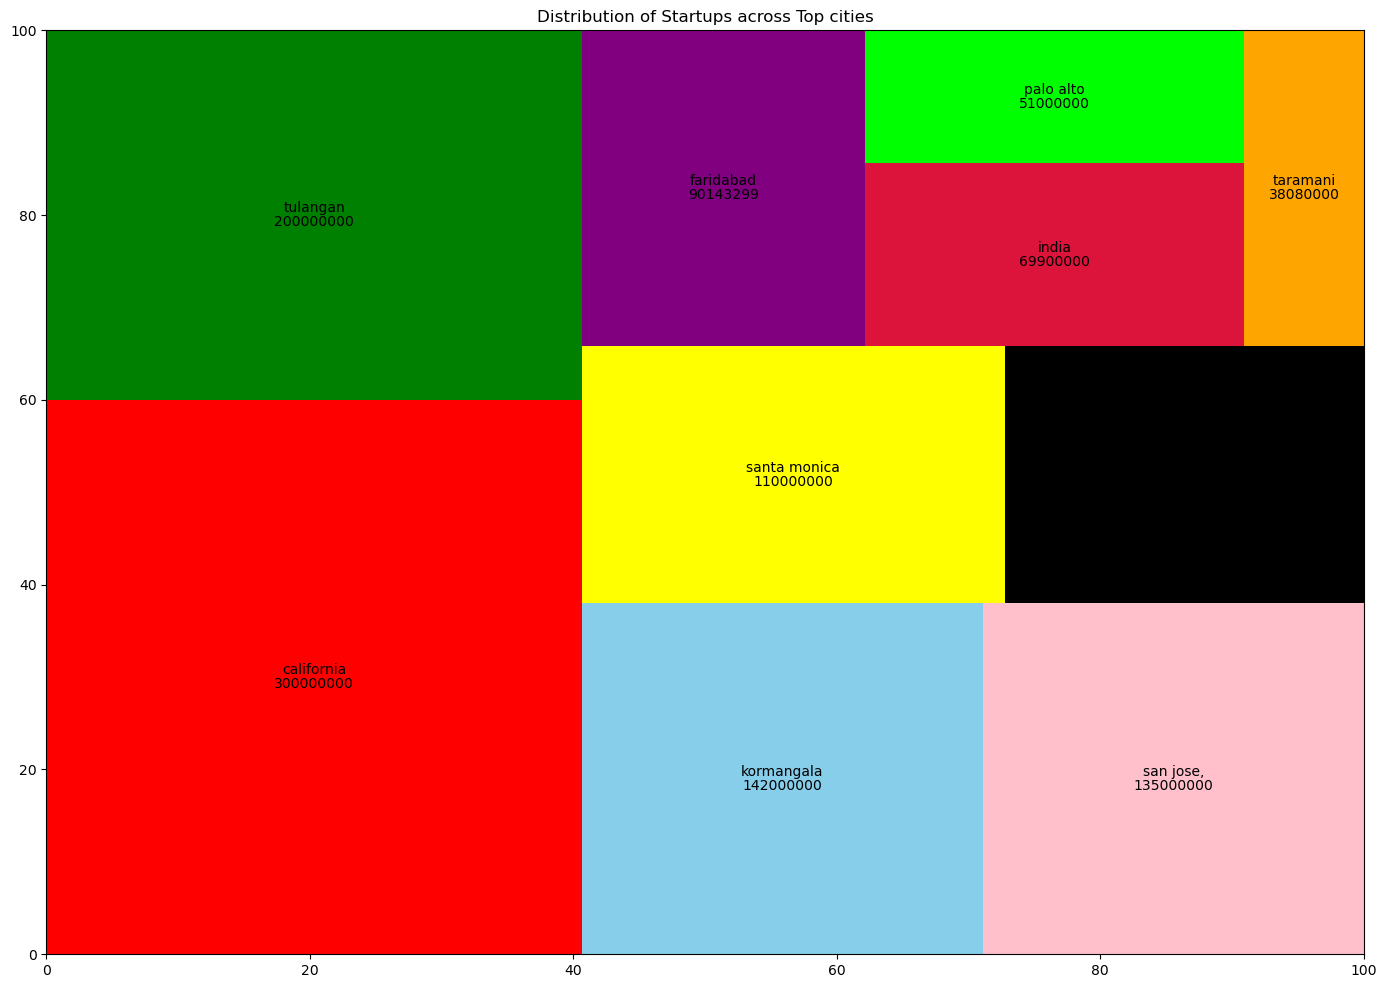

In [50]:
plt.figure(figsize=(17,12))
mean_amount = newdf.groupby('City  Location').mean()["Amount in USD"].astype('int').sort_values(ascending=False).iloc[1:].head(10)
squarify.plot(sizes=mean_amount.values,label=mean_amount.index, value=mean_amount.values,color=['red','green','skyblue','pink','yellow','black','purple','crimson','lime','orange'])
plt.title('Distribution of Startups across Top cities')